# **Desarrollo prueba tecnica - Ingenieria de datos**

In [1]:
from utilidades import proceso

2024-10-13 15:01:53 - [WARNING] - No se encontro la carpeta "c:\Users\ximmarti\Documents\analitica - copia\logs" para guardar los logs


 ___ __  __ ____   _    _        _    
|_ _|  \/  |  _ \ / \  | |      / \   
 | || |\/| | |_) / _ \ | |     / _ \  
 | || |  | |  __/ ___ \| |___ / ___ \ 
|___|_|  |_|_| /_/   \_\_____/_/   \_\
                                      
 _   _ _____ _     ____  _____ ____  
| | | | ____| |   |  _ \| ____|  _ \ 
| |_| |  _| | |   | |_) |  _| | |_) |
|  _  | |___| |___|  __/| |___|  _ < 
|_| |_|_____|_____|_|   |_____|_| \_\
                                     



In [2]:
# SE IMPORTAN LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# SE CARGAN LAS BASES DE DATOS
df_clientes = pd.read_csv('CLIENTES.csv')
df_canales = pd.read_csv('CANALES.csv')
df_trx = pd.read_csv('TRANSACCIONES.csv')
pd.options.display.float_format = '{:,.0f}'.format
pd.options.display.float_format = '{:.2f}'.format 
pd.options.display.max_rows=2000000 
pd.options.display.max_columns=2000000 

In [4]:
print('Dimensiones de base de clientes:',df_clientes.shape)
df_clientes.head(3)

Dimensiones de base de clientes: (701052, 5)


,tipo_doc,num_doc,nombre,tipo_persona,ingresos_mensuales
0,CEDULA DE CIUDADANIA,4421808272321123514,41db2e3894705b1f5297c3c15fcbff159319d718ebc6d3...,PERSONA NATURAL,4784972.00
1,CEDULA DE CIUDADANIA,-425016439970959851,b3533bb72a2873d6d17bdea203df0782b2b27a087e7b70...,PERSONA NATURAL,6812197.00
2,TARJETA DE IDENTIDAD,3258301343750323585,8cc728901dd7ed55480c66c1c1f82a09a58a1dcd4722cc...,PERSONA NATURAL,3828842.00


In [5]:
print('Dimensiones de base de canales:',df_canales.shape)
df_canales.head(3)

Dimensiones de base de canales: (32974, 4)


,codigo,nombre,tipo,cod_jurisdiccion
0,1000115,c3783ad5e1b55d05e88d3ce1d52f9a749cf72ff55935f6...,SUCURSAL,66001
1,1000789,80ccd96245265d11756e94b4a0cfc739b5919abcc1b28f...,SUCURSAL,13001
2,1000741,90c2124568a87285a9a98b5d6d05cf66875f606b15315c...,SUCURSAL,76001


In [6]:
print('Dimensiones de base de transacciones:',df_trx.shape)
df_trx.head(3)

Dimensiones de base de transacciones: (2360614, 6)


,fecha_transaccion,cod_canal,tipo_doc,num_doc,naturaleza,monto
0,2024-05-31,1000527.00,DOCUMENTO VENEZOLANO/CARNET DIPLOMÁTICO,-7274200446135149441,SALIDA,471000.00
1,2024-05-31,1000527.00,CEDULA DE CIUDADANIA,-7274200446135149441,SALIDA,471000.00
2,2024-05-31,1000749.00,NIT,-2895732447780163114,SALIDA,3000000.00


* Se observa que tipo de dato contiene las bases

In [7]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701052 entries, 0 to 701051
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tipo_doc            701052 non-null  object 
 1   num_doc             701052 non-null  int64  
 2   nombre              701052 non-null  object 
 3   tipo_persona        701052 non-null  object 
 4   ingresos_mensuales  701052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 26.7+ MB


In [8]:
df_canales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32974 entries, 0 to 32973
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo            32974 non-null  int64 
 1   nombre            32974 non-null  object
 2   tipo              32974 non-null  object
 3   cod_jurisdiccion  32974 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [9]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360614 entries, 0 to 2360613
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fecha_transaccion  object 
 1   cod_canal          float64
 2   tipo_doc           object 
 3   num_doc            int64  
 4   naturaleza         object 
 5   monto              float64
dtypes: float64(2), int64(1), object(3)
memory usage: 108.1+ MB


* Se valida la presencia de valores faltantes en las bases

In [10]:
print("------------VALORES FALTANTES ------------")
print("----------------CLIENTES------------------")
print(df_clientes.isna().sum())
print("-----------------CANALES------------------")
print(df_canales.isna().sum())
print("--------------TRANSACCIONES---------------")
print(df_trx.isna().sum())

------------VALORES FALTANTES ------------
----------------CLIENTES------------------
tipo_doc              0
num_doc               0
nombre                0
tipo_persona          0
ingresos_mensuales    0
dtype: int64
-----------------CANALES------------------
codigo              0
nombre              0
tipo                0
cod_jurisdiccion    0
dtype: int64
--------------TRANSACCIONES---------------
fecha_transaccion    0
cod_canal            0
tipo_doc             0
num_doc              0
naturaleza           0
monto                0
dtype: int64


In [11]:
df_clientes = df_clientes.drop_duplicates()
df_canales = df_canales.drop_duplicates()
#df_trx = df_trx.drop_duplicates()
print(df_clientes.shape,df_canales.shape,df_trx.shape)

(701052, 5) (32974, 4) (2360614, 6)


* Se observa el contenido de las bases de datos 

In [12]:
print('La base de datos de cliente tiene ', df_clientes.num_doc.nunique(), 'numeros de documentos únicos')
print('Dimensiones del df eliminando registros duplicados', df_clientes.drop_duplicates().shape)
print('-------------------------------------------------------------------------------------')
print(df_clientes.tipo_persona.value_counts())
print('-------------------------------------------------------------------------------------')
print(df_clientes.tipo_doc.value_counts())
print('-------------------------------------------------------------------------------------')
df_clientes[['ingresos_mensuales']].describe()

La base de datos de cliente tiene  698022 numeros de documentos únicos
Dimensiones del df eliminando registros duplicados (701052, 5)
-------------------------------------------------------------------------------------
tipo_persona
PERSONA NATURAL     677332
PERSONA JURIDICA     21888
-                     1532
NATURAL                300
Name: count, dtype: int64
-------------------------------------------------------------------------------------
tipo_doc
CEDULA DE CIUDADANIA                         660274
NIT                                           21886
TARJETA DE IDENTIDAD                           8199
REGISTRO CIVIL                                 5172
CEDULA DE EXTRANJERIA                          2700
-                                              1925
PASAPORTE                                       652
DOCUMENTO VENEZOLANO/CARNET DIPLOMÁTICO         237
ID EXTRANJERO PN NO RESIDENTE EN COLOMBIA         5
ID EXTRANJERO PJ NO RESIDENTE COLOMBIA            2
Name: count, dtype

,ingresos_mensuales
count,701052.00
mean,5036959.24
std,2883297.68
min,1850.00
25%,2575704.00
50%,5032722.00
75%,7528875.00
max,9995531.00


In [13]:
print('la base de datos de canales tiene',df_canales.codigo.nunique(),'codigos de canales únicos')
print('-------------------------------------------------------------------------------------')
print(df_canales.tipo.value_counts())
print('-------------------------------------------------------------------------------------')
print('la base de datos de canales tiene',df_canales.cod_jurisdiccion.nunique(),'codigos de jurisdicciones diferentes')
df_canales.cod_jurisdiccion.value_counts()

la base de datos de canales tiene 32974 codigos de canales únicos
-------------------------------------------------------------------------------------
tipo
CORRESPONSAL    27061
CAJERO           5330
SUCURSAL          583
Name: count, dtype: int64
-------------------------------------------------------------------------------------
la base de datos de canales tiene 1092 codigos de jurisdicciones diferentes


cod_jurisdiccion
11001    3898
5001     2777
76001    1374
54001     867
8001      703
68001     624
50001     595
13001     557
73001     509
5088      501
41001     362
23001     358
66001     355
52001     308
17001     306
5360      298
19001     291
47001     285
20001     278
25754     276
5266      258
68276     244
76520     238
15001     219
63001     206
8758      197
5615      183
68547     155
76834     147
70001     146
15238     140
85001     130
68081     130
68307     127
66170     127
15759     125
25290     120
5631      119
5045      116
18001     116
76364     112
54405     111
50006     102
54498     102
54874      96
5837       95
52356      94
25175      92
76130      91
25899      89
76111      88
5376       88
41551      85
76892      82
76147      82
44001      81
5736       79
20011      78
68679      78
54810      78
50313      77
44430      76
5212       76
5380       75
19698      74
50568      71
25269      71
5129       69
54518      69
5154       69
254

In [14]:
print('La información transaccional de la base comprende un periodo entre',df_trx.fecha_transaccion.min(),'y', df_trx.fecha_transaccion.max())
print('La base transaccional contiene', df_trx.cod_canal.nunique(),'codigos de canales diferentes')
print('La base transaccional contiene las transacciones de', df_trx.num_doc.nunique(),'numeros de documentos diferentes')
print('--------------------------------------------------------------------------------------')
print(df_trx.tipo_doc.value_counts())
print('--------------------------------------------------------------------------------------')
print(df_trx.naturaleza.value_counts())
print('--------------------------------------------------------------------------------------')
f_trx = df_trx.groupby(['fecha_transaccion']).agg({'monto':'sum'}).reset_index()
print(f_trx.head())

La información transaccional de la base comprende un periodo entre 2024-01-01 y 2024-10-07
La base transaccional contiene 32986 codigos de canales diferentes
La base transaccional contiene las transacciones de 70553 numeros de documentos diferentes
--------------------------------------------------------------------------------------
tipo_doc
CEDULA DE CIUDADANIA                         1949187
NIT                                           326567
-                                              46138
TARJETA DE IDENTIDAD                           18713
REGISTRO CIVIL                                 10709
CEDULA DE EXTRANJERIA                           6913
PASAPORTE                                       1794
DOCUMENTO VENEZOLANO/CARNET DIPLOMÁTICO          530
ID EXTRANJERO PN NO RESIDENTE EN COLOMBIA         63
Name: count, dtype: int64
--------------------------------------------------------------------------------------
naturaleza
ENTRADA    1224183
SALIDA     1136431
Name: count, dty

In [15]:
print('--------------------------------------------------------------------------------------')
c_trx = df_trx.groupby(['cod_canal']).agg({'monto':'sum'}).reset_index()
print(c_trx.head())
print('--------------------------------------------------------------------------------------')
df_trx[['monto']].describe()

--------------------------------------------------------------------------------------
   cod_canal         monto
0 1000001.00 6019164344.00
1 1000002.00 3080081204.00
2 1000004.00 4978571025.00
3 1000005.00 9336710750.00
4 1000006.00 5288804867.00
--------------------------------------------------------------------------------------


,monto
count,2360614.00
mean,5055434.03
std,163315380.38
min,1.00
25%,100000.00
50%,300000.00
75%,1000000.00
max,47755000000.00


Despues de observar el contenido de las bases de datos, se sacan las primeras conclusiones:

**Base de datos clientes:**
La dimensión de la base de datos de clientes discrepa con la cantidad de numeros de documentos únicos de los clientes, esto probablemente se da debido a que hay clientes que comparten el mismo numero de documento pero tienen un tipo de documento diferente o porque hay registros duplicados,
sin embargo hay 1925 registros que se desconoce el tipo de documento ya que tiene el valor de "-", tambien hay 1532 registros dentro del campo tipo_persona con el valor "-" y 300 registros con el valor de "NATURAL". En el estado actual de la base no se detectan registros duplicados y no se ha identificado el numero total de clientes unicos.

In [16]:
# correción registros con "NATURAL" en tipo persona
df_clientes.loc[df_clientes['tipo_persona'] == 'NATURAL', 'tipo_persona'] = 'PERSONA NATURAL'
df_clientes.tipo_persona.value_counts() # se verifica el resultado

tipo_persona
PERSONA NATURAL     677632
PERSONA JURIDICA     21888
-                     1532
Name: count, dtype: int64

**Base de datos canales:**
La dimensión de la base de datos de canales coincide con la cantidad de codigos unicos de los canales (32974 canales unicos, 32974 registros), de momento no se encontraro, inconsistencia en los registros de la tabla.

**Base de datos transacciones:**
Es la base de datos con mayor número de registros, de momento no se encontraron errores en los registros de las columnas fecha_transaccion, cod_canal,num_doc, naturaleza y monto, solo se evidencio que en la columna tipo_doc hay 46138 registros con el valor de "-".

In [17]:
# hallazgo valores repetidos
cuenta_doc = df_trx.groupby(['tipo_doc','num_doc']).size().reset_index(name='count').sort_values('count',ascending=False)
df_trx[df_trx['num_doc']== -2504124284608408578].head()

,fecha_transaccion,cod_canal,tipo_doc,num_doc,naturaleza,monto
99346,2024-08-27,1000960.00,-,-2504124284608408578,SALIDA,802636987.00
99347,2024-08-27,1000960.00,-,-2504124284608408578,SALIDA,802636987.00
99348,2024-08-27,1000960.00,NIT,-2504124284608408578,SALIDA,802636987.00
99349,2024-08-27,1000960.00,-,-2504124284608408578,SALIDA,802636987.00
99350,2024-08-27,1000164.00,-,-2504124284608408578,SALIDA,1563997.00


# **Subir bases de datos a la LZ**

In [18]:
import os
import time
import pandas as pd
from datetime import datetime
from sparky_bc import Sparky
from retry import retry
from helper import Helper
import re
import shutil
from tabulate import tabulate
from sql import queries as query

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [19]:
user = os.getenv('user')
pwd = os.getenv('pwd')
dsn = os.getenv('dsn')
hp = Helper(dsn = dsn)
ruta_sql = os.path.join(os.getcwd(), 'sql')

2024-10-13 15:01:59 - [WARNING] - No se encontro la carpeta "c:\Users\ximmarti\Documents\analitica - copia\logs" para guardar los logs


 ___ __  __ ____   _    _        _    
|_ _|  \/  |  _ \ / \  | |      / \   
 | || |\/| | |_) / _ \ | |     / _ \  
 | || |  | |  __/ ___ \| |___ / ___ \ 
|___|_|  |_|_| /_/   \_\_____/_/   \_\
                                      
 _   _ _____ _     ____  _____ ____  
| | | | ____| |   |  _ \| ____|  _ \ 
| |_| |  _| | |   | |_) |  _| | |_) |
|  _  | |___| |___|  __/| |___|  _ < 
|_| |_|_____|_____|_|   |_____|_| \_\
                                     



In [20]:
sp = proceso.instanciar()

2024-10-13 15:02:00 - [WARNING] - No se encontro la carpeta "c:\Users\ximmarti\Documents\analitica - copia\logs" para guardar los logs


 ____  _____ __  __  ___ _____ _____ 
|  _ \| ____|  \/  |/ _ \_   _| ____|
| |_) |  _| | |\/| | | | || | |  _|  
|  _ <| |___| |  | | |_| || | | |___ 
|_| \_\_____|_|  |_|\___/ |_| |_____|
                                     
 ____  ____   _    ____  _  __
/ ___||  _ \ / \  |  _ \| |/ /
\___ \| |_) / _ \ | |_) | ' / 
 ___) |  __/ ___ \|  _ <| . \ 
|____/|_| /_/   \_\_| \_\_|\_\
                              

Conexión con el hostname :sbmdeblze003.bancolombia.corp


In [21]:
sp.subir_df(df_clientes,'proceso_cumplimiento.clientes_base_prueba_x',modo='overwrite')

---------------------------------------------------------------------------------------------
  i   tipo                    nombre                     estado     hora_inicio   duracion   
---------------------------------------------------------------------------------------------
 1/1 DF A LZ ...o_cumplimiento.clientes_base_prueba_x   ejecutando   03:02:02 PM             

2024-10-13 15:02:07 - [INFO] - Intento 1 de 3


 1/1 DF A LZ ...o_cumplimiento.clientes_base_prueba_x     subir_lz   03:02:02 PM             

2024-10-13 15:04:49 - [INFO] - Transcurrido: 1728849890, Tiempo de Refresco = 1000


 1/1 DF A LZ ...o_cumplimiento.clientes_base_prueba_x   finalizado   03:02:02 PM     07:14.7 
---------------------------------------------------------------------------------------------


In [22]:
sp.subir_df(df_canales,'proceso_cumplimiento.canales_base_prueba_x',modo='overwrite')

---------------------------------------------------------------------------------------------
  i   tipo                    nombre                     estado     hora_inicio   duracion   
---------------------------------------------------------------------------------------------
 2/2 DF A LZ ...so_cumplimiento.canales_base_prueba_x   ejecutando   03:09:16 PM             

2024-10-13 15:09:21 - [INFO] - Intento 1 de 3


 2/2 DF A LZ ...so_cumplimiento.canales_base_prueba_x   finalizado   03:09:16 PM     08:37.1 
---------------------------------------------------------------------------------------------


In [23]:
sp.subir_df(df_trx,'proceso_cumplimiento.transacciones_base_prueba_x',modo='overwrite')

---------------------------------------------------------------------------------------------
  i   tipo                    nombre                     estado     hora_inicio   duracion   
---------------------------------------------------------------------------------------------
 3/3 DF A LZ ...plimiento.transacciones_base_prueba_x   ejecutando   03:17:54 PM             

2024-10-13 15:17:58 - [INFO] - Intento 1 de 3


 3/3 DF A LZ ...plimiento.transacciones_base_prueba_x   finalizado   03:17:54 PM     08:03.7 
---------------------------------------------------------------------------------------------


In [24]:
proceso.ejectuar_etl()

2024-10-13 15:25:58 - [INFO] - Transcurrido: 1728851158, Tiempo de Refresco = 1000


-----------------------------------------------------------------------------------------------
                                        CONSULTA_DF.sql                                        
-----------------------------------------------------------------------------------------------
   i    tipo                    nombre                     estado     hora_inicio   duracion   
-----------------------------------------------------------------------------------------------
  1/15    DROP ...o_cumplimiento.info_clientes_completa   finalizado   03:25:59 PM     00:01.4 
  2/15  CREATE ...o_cumplimiento.info_clientes_completa   finalizado   03:26:00 PM     00:07.3 
  3/15 COMPUTE ...o_cumplimiento.info_clientes_completa   finalizado   03:26:07 PM     00:01.4 
  4/15    DROP      proceso_cumplimiento.base_trx_final   finalizado   03:26:09 PM     00:00.4 
  5/15  CREATE      proceso_cumplimiento.base_trx_final   finalizado   03:26:09 PM     00:04.1 
  6/15 COMPUTE      proceso_cumplimiento

## **ESTADISTICA DESCRIPTIVA**

In [25]:
df = proceso.consulta_df(sp)

Exracción del dataset
┌─────────────────────┬─────────────────────┬──────────────────┬─────────┬───────────┐
│ Start Query         │ End Query           │ Execution time   │    Rows │   Columns │
├─────────────────────┼─────────────────────┼──────────────────┼─────────┼───────────┤
│ 13-10-2024-15:26:33 │ 13-10-2024-15:34:42 │ 0:08:08.71       │ 2315186 │        12 │
└─────────────────────┴─────────────────────┴──────────────────┴─────────┴───────────┘


In [27]:
dataset = df['df_dataset']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315186 entries, 0 to 2315185
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   fecha_transaccion   datetime64[ns]
 1   tipo_doc            object        
 2   num_doc             int64         
 3   nombre              object        
 4   tipo_persona        object        
 5   ingresos_mensuales  float64       
 6   naturaleza          object        
 7   monto               float64       
 8   cod_canal           float64       
 9   nom_canal           object        
 10  tipo                object        
 11  cod_jurisdiccion    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 212.0+ MB


## cliente

In [28]:
# se crea data set con la información unica por cliente en donde contiene sus ingresos mensuales, su tipo de documento y el tipo de persona
gruopby_clientes = dataset.groupby(['tipo_doc','num_doc','tipo_persona',]).agg({'ingresos_mensuales':'max'}).reset_index()
gruopby_clientes.head()

,tipo_doc,num_doc,tipo_persona,ingresos_mensuales
0,CEDULA DE CIUDADANIA,-9223285194817728665,PERSONA NATURAL,1742864.00
1,CEDULA DE CIUDADANIA,-9223026642823825931,PERSONA NATURAL,3569344.00
2,CEDULA DE CIUDADANIA,-9222427147488762171,PERSONA NATURAL,4170441.00
3,CEDULA DE CIUDADANIA,-9222364663196755905,PERSONA NATURAL,6772642.00
4,CEDULA DE CIUDADANIA,-9222142375263091888,PERSONA NATURAL,2462103.00


In [29]:
def calcular_frecuencia_porcentaje(df, columna):

    conteos = df[columna].value_counts()

    # Calcular los porcentajes
    porcentaje = (conteos / conteos.sum()) * 100

    # Crear un DataFrame con los resultados
    tabla_resultados = pd.DataFrame({
        'Frecuencia': conteos,
        'Porcentaje (%)': porcentaje
    })

    return tabla_resultados

In [30]:
tipo_persona_c = proceso.calcular_frecuencia_porcentaje(gruopby_clientes, 'tipo_persona')
tipo_doc_c = proceso.calcular_frecuencia_porcentaje(gruopby_clientes, 'tipo_doc')

In [31]:
print(gruopby_clientes.tipo_persona.describe())
print('-----------------------------------------------')
print(tipo_persona_c)
print('-----------------------------------------------')
print(gruopby_clientes.tipo_doc.describe())
print('-----------------------------------------------')
print(tipo_doc_c)

count               70651
unique                  2
top       PERSONA NATURAL
freq                68320
Name: tipo_persona, dtype: object
-----------------------------------------------
                  Frecuencia  Porcentaje (%)
tipo_persona                                
PERSONA NATURAL        68320           96.70
PERSONA JURIDICA        2331            3.30
-----------------------------------------------
count                    70651
unique                       8
top       CEDULA DE CIUDADANIA
freq                     66735
Name: tipo_doc, dtype: object
-----------------------------------------------
                                           Frecuencia  Porcentaje (%)
tipo_doc                                                             
CEDULA DE CIUDADANIA                            66735           94.46
NIT                                              2331            3.30
TARJETA DE IDENTIDAD                              751            1.06
REGISTRO CIVIL                    

Se cuenta con la información de 70651 clientes diferentes, tanto demografica, como transaccional y el detalle de sus operaciones.
la etiqueta de tipo_persona cuenta con dos categorias en donde hay una concentración del 96% de clientes personas naturales, en cuento al tipo de documento, se cuenta con 9 categorias en donde el documento mas comun es la cedula de ciudadania con un porcentaje de participación del 94%.

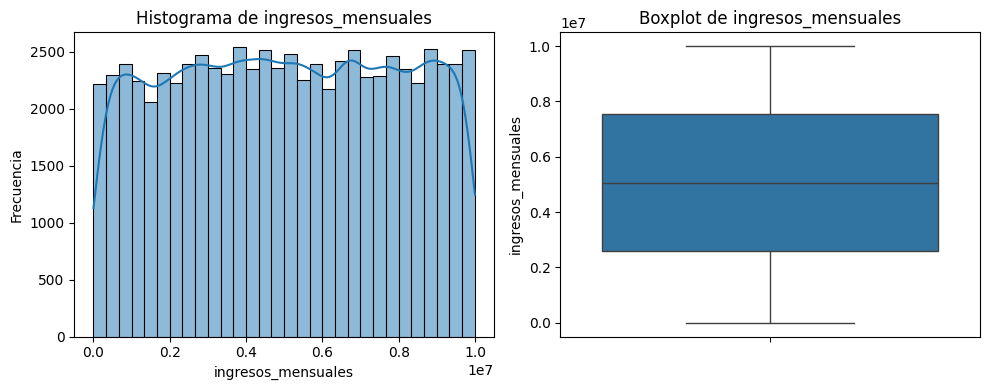

In [33]:
proceso.plot_histogram_and_boxplot(gruopby_clientes, 'ingresos_mensuales')

In [34]:
gruopby_clientes['ingresos_mensuales'].describe()

count     70651.00
mean    5047118.62
std     2877258.12
min        1850.00
25%     2594933.50
50%     5040194.00
75%     7531422.00
max     9995531.00
Name: ingresos_mensuales, dtype: float64

El valor mínimo es 1,850, lo que representa un ingreso muy bajo comparado con el promedio, el valor máximo es de 9,995,531, lo que indica que algunos individuos tienen ingresos mensuales significativamente más altos explicando la alta variabilidad que se presenta en los datos, a pesar de que la media y la mediana tienen valores muy parecidos.

### CANALES

In [35]:
# se crea data set con la información de los canales utlizados por los clientes en el periodo de estudio 
gruopby_canales = dataset.groupby(['cod_canal', 'tipo', 'naturaleza']).agg(monto=('monto', 'sum'),frec=('monto', 'count')).reset_index()
gruopby_canales.head()

,cod_canal,tipo,naturaleza,monto,frec
0,1000001.00,SUCURSAL,ENTRADA,3376983506.00,382
1,1000001.00,SUCURSAL,SALIDA,2598714112.00,100
2,1000002.00,SUCURSAL,ENTRADA,1572811532.00,133
3,1000002.00,SUCURSAL,SALIDA,1293438672.00,117
4,1000004.00,SUCURSAL,ENTRADA,1775330566.00,215


In [36]:
canal_f = proceso.calcular_frecuencia_porcentaje(gruopby_canales, 'tipo')
canal_f

,Frecuencia,Porcentaje (%)
tipo,,
CORRESPONSAL,39417,85.87
CAJERO,5330,11.61
SUCURSAL,1156,2.52


In [37]:
tipo_canales = gruopby_canales.groupby(['tipo','naturaleza']).agg(monto=('monto', 'sum'),frec=('frec', 'sum')).reset_index()

C:\Users\ximmarti\AppData\Local\Temp\ipykernel_33136\3527148438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='tipo', y='monto', data=tipo_canales [tipo_canales ['naturaleza'] == 'ENTRADA'], palette='viridis')
C:\Users\ximmarti\AppData\Local\Temp\ipykernel_33136\3527148438.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='tipo', y='monto', data=tipo_canales [tipo_canales ['naturaleza'] == 'SALIDA'], palette='viridis')
C:\Users\ximmarti\AppData\Local\Temp\ipykernel_33136\3527148438.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

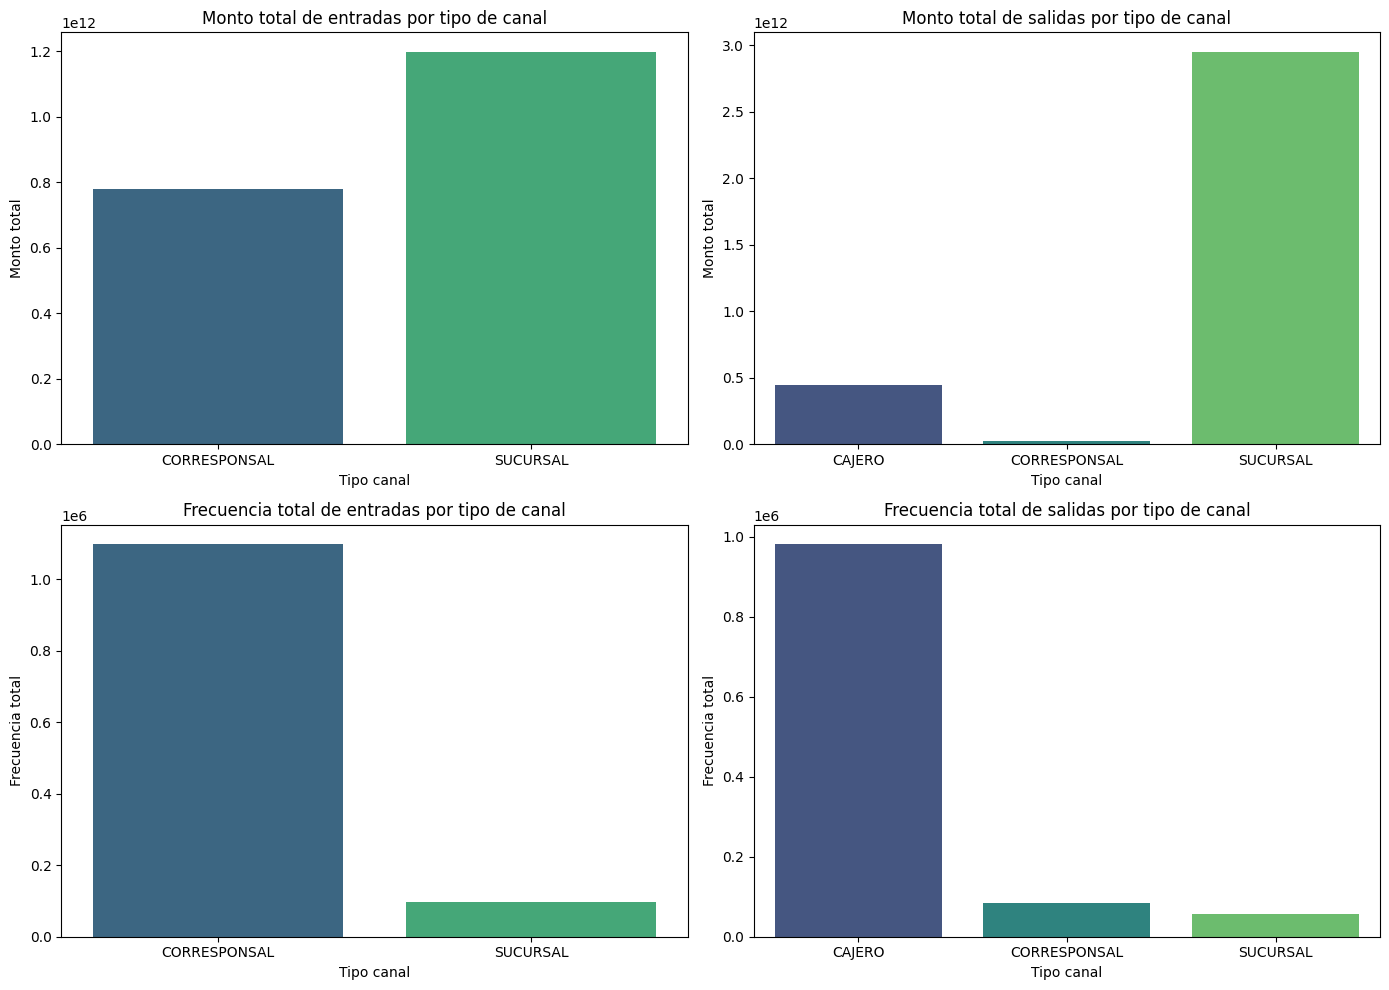

In [38]:

# Crear la figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Monto total de entradas por tipo de canal
sns.barplot(ax=axes[0, 0], x='tipo', y='monto', data=tipo_canales [tipo_canales ['naturaleza'] == 'ENTRADA'], palette='viridis')
axes[0, 0].set_title('Monto total de entradas por tipo de canal')
axes[0, 0].set_xlabel('Tipo canal')
axes[0, 0].set_ylabel('Monto total')

# Gráfico 2: Monto total de salidas por tipo de canal
sns.barplot(ax=axes[0, 1], x='tipo', y='monto', data=tipo_canales [tipo_canales ['naturaleza'] == 'SALIDA'], palette='viridis')
axes[0, 1].set_title('Monto total de salidas por tipo de canal')
axes[0, 1].set_xlabel('Tipo canal')
axes[0, 1].set_ylabel('Monto total')

# Gráfico 3: Frecuencia total de entradas por tipo de canal
sns.barplot(ax=axes[1, 0], x='tipo', y='frec', data=tipo_canales [tipo_canales ['naturaleza'] == 'ENTRADA'], palette='viridis')
axes[1, 0].set_title('Frecuencia total de entradas por tipo de canal')
axes[1, 0].set_xlabel('Tipo canal')
axes[1, 0].set_ylabel('Frecuencia total')

# Gráfico 4: Frecuencia total de salidas por tipo de canal
sns.barplot(ax=axes[1, 1], x='tipo', y='frec', data=tipo_canales [tipo_canales ['naturaleza'] == 'SALIDA'], palette='viridis')
axes[1, 1].set_title('Frecuencia total de salidas por tipo de canal')
axes[1, 1].set_xlabel('Tipo canal')
axes[1, 1].set_ylabel('Frecuencia total')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Se puede observar que el canal mas masivo son los corresponsales representando un 85% del total de canales, el canal que mas maneja recursos tanto en entradas y en salidas son las sucursales pero tienen una menor frecuencia, que los demas canales, el corresponsal es el canal mas utlizado para hacer operaciones de entradas mientras que el canal mas utlizado para hacer retiros de dinero son los cajeros.

## Transaccionalidad 

In [39]:
dataset['mes'] = dataset['fecha_transaccion'].dt.month
gruopby_mes_m = dataset.groupby('mes')['monto'].sum().reset_index()
gruopby_mes_f = dataset.groupby('mes')['monto'].count().reset_index()

C:\Users\ximmarti\AppData\Local\Temp\ipykernel_33136\1281211249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='mes', y='monto', data=gruopby_mes_m, palette='viridis')
C:\Users\ximmarti\AppData\Local\Temp\ipykernel_33136\1281211249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='monto', data=gruopby_mes_m,  palette='viridis')


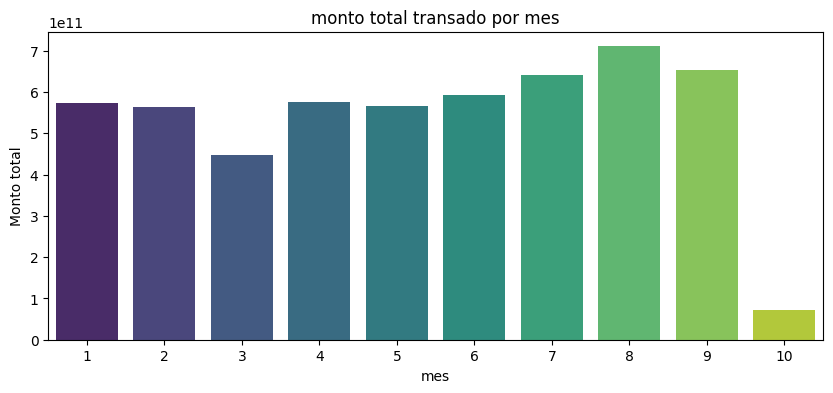

In [40]:
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x='mes', y='monto', data=gruopby_mes_m, palette='viridis')

sns.barplot(x='mes', y='monto', data=gruopby_mes_m,  palette='viridis')
plt.xlabel('mes')
plt.ylabel('Monto total')
plt.title('monto total transado por mes')
plt.show()

C:\Users\ximmarti\AppData\Local\Temp\ipykernel_33136\2985012240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='mes', y='monto', data=gruopby_mes_f, palette='viridis')
C:\Users\ximmarti\AppData\Local\Temp\ipykernel_33136\2985012240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='monto', data=gruopby_mes_m,  palette='viridis')


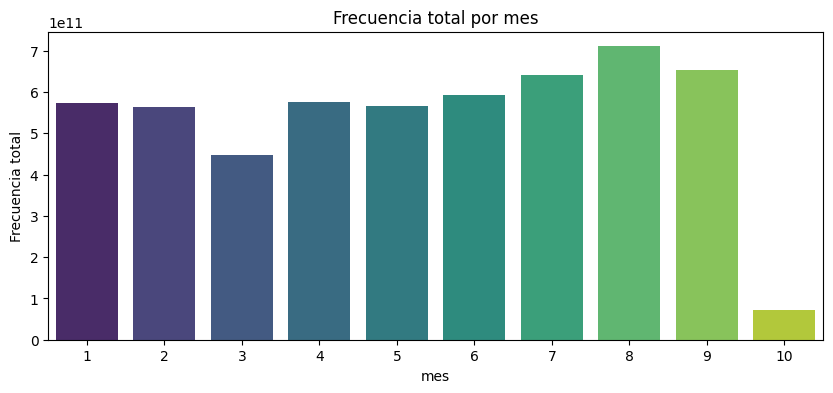

In [41]:
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x='mes', y='monto', data=gruopby_mes_f, palette='viridis')

sns.barplot(x='mes', y='monto', data=gruopby_mes_m,  palette='viridis')
plt.xlabel('mes')
plt.ylabel('Frecuencia total')
plt.title('Frecuencia total por mes')
plt.show()

Se puedo evidenciar que el mes con mayores movimientos transaccionales tanto en frecuencia como en monto fue el mes de agosto

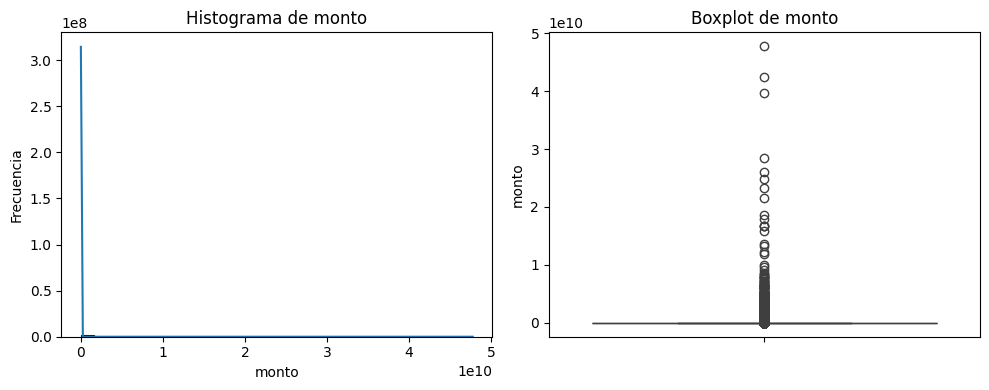

In [42]:
proceso.plot_histogram_and_boxplot(dataset, 'monto')

In [43]:
dataset.monto.describe()

count       2315186.00
mean        2331440.03
std        83098038.40
min               1.00
25%          100000.00
50%          300000.00
75%         1000000.00
max     47755000000.00
Name: monto, dtype: float64

Se puede observar que hay un alta variabilidad en las transacciones realizadas por los clientes en el periodo de 202401-202410, en donde el monto minimo transado es de 1 y el monto maximo  47,755,000,000, se evidencia la presencia de valores muy altos lo cual hace que la media tenga un valor muy por encima de la mediana sesgando la distribución de las transacciones hacia la derecha con una alta concentración en valores bajos, el 75% de las transacciones son menor a 1.000.000.

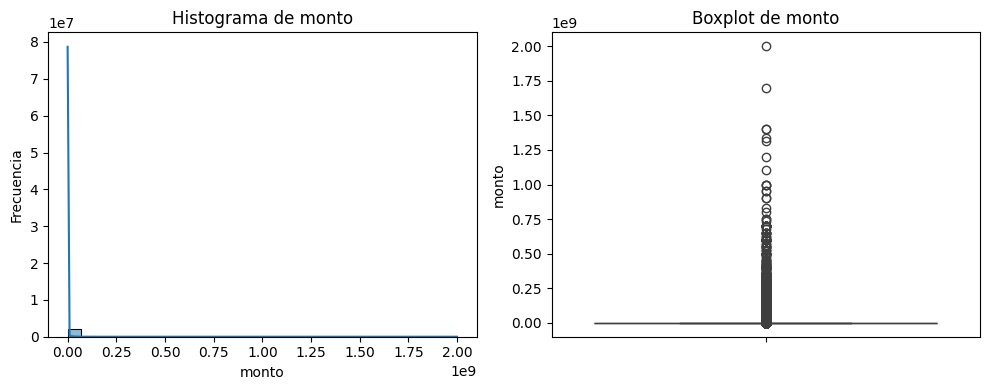

In [44]:
proceso.plot_histogram_and_boxplot(dataset[dataset['tipo_persona'] == 'PERSONA NATURAL'], 'monto')

In [45]:
dataset[dataset['tipo_persona'] == 'PERSONA NATURAL'].monto.describe()

count      1988511.00
mean       1049352.99
std        7441019.93
min              1.00
25%         100000.00
50%         300000.00
75%         800000.00
max     2000000000.00
Name: monto, dtype: float64

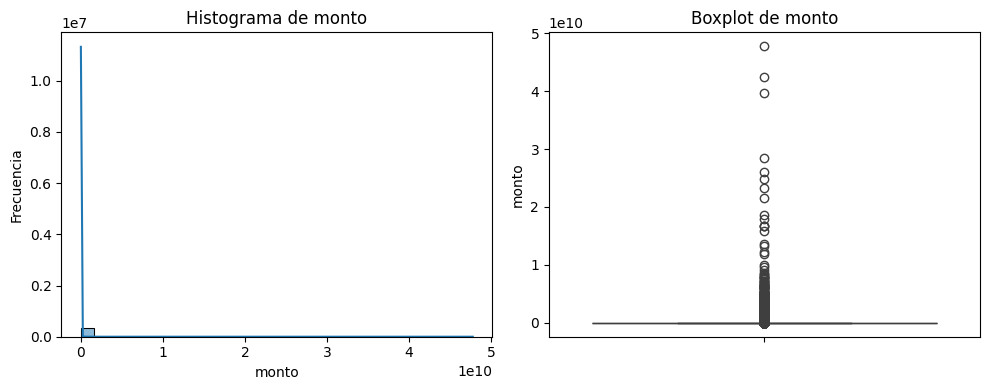

In [46]:
proceso.plot_histogram_and_boxplot(dataset[dataset['tipo_persona'] == 'PERSONA JURIDICA'], 'monto')

In [47]:
dataset[dataset['tipo_persona'] == 'PERSONA JURIDICA'].monto.describe()

count        326675.00
mean       10135661.94
std       220297023.11
min               1.00
25%          269900.00
50%          865004.00
75%         2164914.00
max     47755000000.00
Name: monto, dtype: float64

Se separo el monto transado por tipo de persona y aun asi en las dos distribuciones se puede puede observar alta variabilidad, en donde el monto minimo transado es de 1 con una gran diferencia con respecto al monto maximo transado en los dos casos, por lo tanto la media tiene un valor muy por encima de la mediana sesgando la distribución de las transacciones hacia la derecha con una alta concentración en valores bajos.

In [48]:
#transaccionalidad del cliente por mes
mes_trans_cli = dataset.groupby(['mes','num_doc','tipo_doc','naturaleza']).agg(monto=('monto', 'sum'),ing=('ingresos_mensuales','max')).reset_index()
#transaccionalidad del cliente total
trans_cli = dataset.groupby(['num_doc','tipo_doc','naturaleza']).agg(monto=('monto', 'sum'),frec=('monto','count')).reset_index()

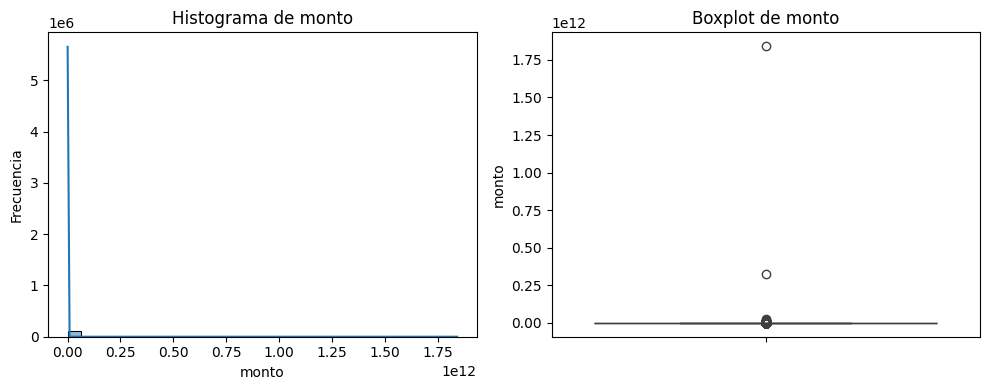

In [49]:
trans_cli_e = trans_cli[trans_cli['naturaleza'] == 'ENTRADA']
proceso.plot_histogram_and_boxplot(trans_cli, 'monto')

In [50]:
trans_cli_e.describe()

,num_doc,monto,frec
count,57234.00,57234.00,57234.00
mean,10036969322830840.00,34531874.61,20.88
std,5322943723896051712.00,1367504899.02,82.84
min,-9223285194817728512.00,27.00,1.00
25%,-4600317954017161216.00,1389250.00,3.00
50%,161651965576560.00,4958000.00,7.00
75%,4613519239247278080.00,15353050.00,17.00
max,9223260062862465024.00,324082565670.00,6724.00


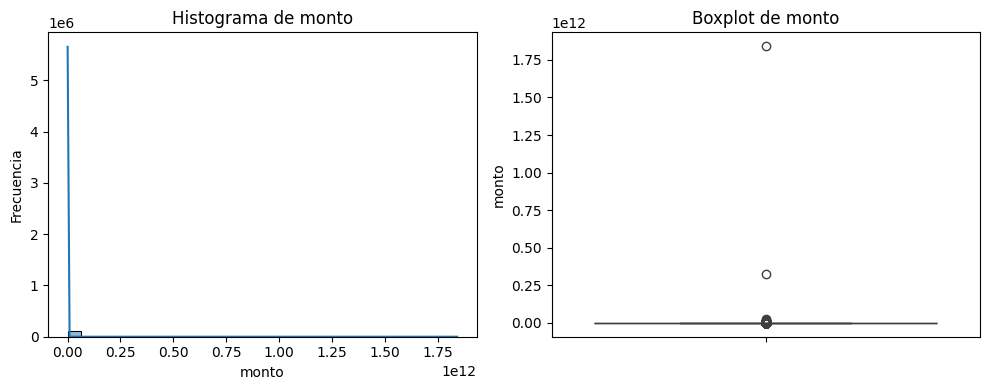

In [51]:
trans_cli_s = trans_cli[trans_cli['naturaleza'] == 'SALIDA']
proceso.plot_histogram_and_boxplot(trans_cli, 'monto')

In [52]:
trans_cli_s.describe()

,num_doc,monto,frec
count,63505.00,63505.00,63505.00
mean,-4385898260902111.00,53874813.28,17.64
std,5323959164258594816.00,7310153653.65,25.88
min,-9223285194817728512.00,456.00,1.00
25%,-4621065849170993152.00,2100000.00,5.00
50%,-25815255782529152.00,5900000.00,12.00
75%,4592761757861093888.00,14380000.00,24.00
max,9223260062862465024.00,1841485159730.00,4414.00


## Calculo del percentil 95 por tipo de cliente

In [53]:
df_percentiles = dataset[dataset['mes'] >= 4] # SE FILTRA LOS UTLIMOS SEIS MESES
df_percentiles_n = df_percentiles[df_percentiles['tipo_persona']=="PERSONA NATURAL"]
df_percentiles_j = df_percentiles[df_percentiles['tipo_persona']=="PERSONA JURIDICA"]
p95_monto_n= df_percentiles_n['monto'].quantile(0.95)
p95_monto_j= df_percentiles_j['monto'].quantile(0.95)

In [54]:
percentiles = df_percentiles.groupby(['tipo_persona','num_doc']).agg(monto=('monto', 'sum')).reset_index()
percentiles_n = percentiles[percentiles['tipo_persona']=="PERSONA NATURAL"]
percentiles_j = percentiles[percentiles['tipo_persona']=="PERSONA JURIDICA"]
p95_monto_na= percentiles_n['monto'].quantile(0.95)
p95_monto_ju= percentiles_j['monto'].quantile(0.95)

In [55]:
print(p95_monto_n,p95_monto_j)
print(p95_monto_na,p95_monto_ju) # PERCENTIL UTILIZADO

2940000.0 17070949.99999998
69477199.59999993 1473840255.9999993
